# Soft and Hard Ensemble Voting Classifiers (DT and kNN).

**Learning Outcomes:**
1. Implement ensemble models using soft and hard voting approaches.
2. Realise the effect of the ensemble on the classifier decision boundaries.

In this exercise, we show how to implement a voting technique in order to combine several models classifications in one powerful model. We train everything on a simple dataset to demonstrate the principles.

Disclaimer: The code is adopted from sklearn tutorial on plot_voting_decision_regions code


In [10]:
%matplotlib inline

In [38]:
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.metrics import f1_score

#from helpers import plotClassBoundary # uncomment to use this function it should be in the same directory of the sheet

## Loading some Gaussian example data with noise

In [5]:
data = pd.read_csv('../../datasets/GaussNoiseC1C2_10perc.csv').to_numpy()
X = data[:, [0,1]]
X1 = X[:,0]
X2 = X[:,1]
y = data[:, 2]

## Training classifiers
Note that DecisionTreeClassifier uses CART by default, currently there is no parameter to change 
it to another algorithm. The default criterion = 'gini' but this can be changed to 'entropy' we 
can choose splitter = 'best'.

The following classifiers have been roughly optimised via trial and error and by knowing the nature of the data. 
Try to optimise by tuning hyper parameters via grid search

In [8]:
clf1 = DecisionTreeClassifier(max_depth=4,min_samples_split=235,min_samples_leaf=20) # min_weight_fraction_leaf=0.1)
#clf1 = DecisionTreeClassifier() # uncomment try this to see overfitting!
clf2 = KNeighborsClassifier(n_neighbors=7)

clfHard = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)], voting='hard', weights=[2, 1])
clfSoft = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)], voting='soft', weights=[2, 1])

# note that you could directly fit the voting models without fitting the individual classifiers separately
# we fit all of them to compare thier performances
clf1.fit(X, y)
clf2.fit(X, y)
clfHard.fit(X, y)
clfSoft.fit(X, y)
pass # to prevent printing

## Plotting decision boundaries of the 4 classifiers

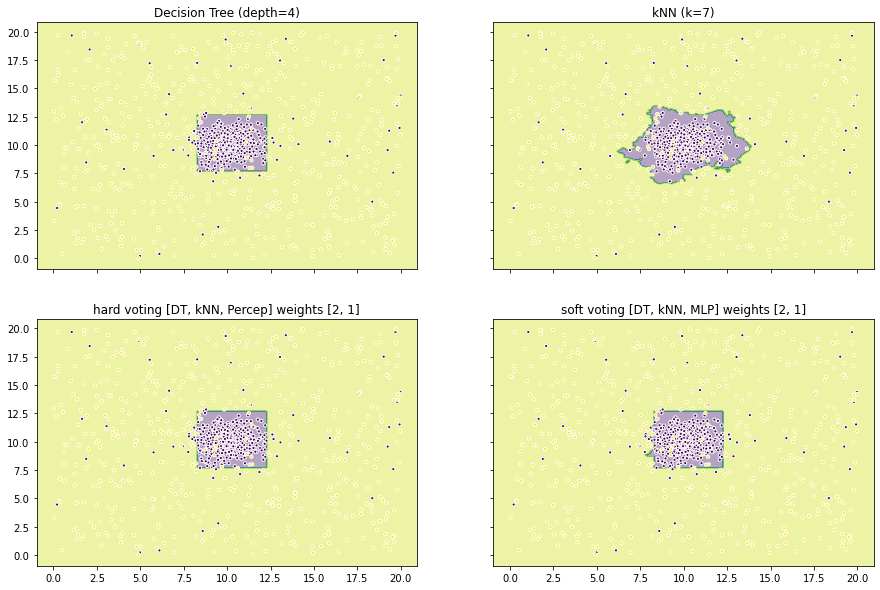

In [14]:
# uncomment to plot the DT
# plt.figure(figsize=(10,6))
# Ptree = plot_tree(clf1, filled=True, fontsize=8)#, rounded=True, label='none', impurity = True, feature_names=['x1', 'x2'], class_names= ['C1', 'C2'])

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15, 10))
titles = ['Decision Tree (depth='+str(clf1.tree_.max_depth)+')', 
                         'kNN (k='+str(clf2.n_neighbors)+')',
                         clfHard.voting + ' voting [DT, kNN, Percep] weights '+ str(clfHard.weights),
                         clfSoft.voting + ' voting [DT, kNN, MLP] weights '   + str(clfSoft.weights)]

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clfHard, clfSoft ],
                        titles):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=10, edgecolor='w', facecolor='w')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Try to use our helper function to plot the boundaries 
plotClassBoundary

### Your Turn

Now it is your turn to apply the same on the titanic dataset to reap the benefit of soft and hard voting.
Imagine, that you have travelled through time with your laptop to the time of before the Titanic is sailing. You have been asked to vet the passengers in case the ship is drowned based on your own prediction whether a passenger is likely to survive or not. Your task is to build a prediction model that will predict if a passenger is likely to survive a ship sink. You are equipped with the titanic dataset and you have decided to build a predictive model to aid you in your decision. The traveling company wants to stay on the safe side by only boarding passengers that are likely to survive even if it meant that they might reject some passengers by mistake.
You would need to 
1. pre-process the dataset as we did in earlier units and then apply both kNN and DT on it.
2. Make sure to split the data first into training and testing, and
3. apply cross validation on the *training set* in order to tune the hyper parameters reliably.
4. Then report the performance of the 4 algorithms on the testing dataset.
5. Use 4 types of scores F1, Accuracy, Precision and Recall (remember we call the precision and recall predict and detect, respectively)
6. Give a final recommendation on which model to use given that we want to stay on the safe side.
7. When picking a model out of the 4, use a suitable performance metric for your decisions to reject or accept a person based on the company needs. Discuss this task on the group if you want.


In [74]:

def classification_report_with_accuracy_score(y_true, y_pred, **kwargs):
    # estimator = kwargs['estimator']
    #print(classification_report(y_true, y_pred, zero_division=0))  # print classification report
    print("fold f1: ", f1_score(y_true, y_pred, average='macro'))
    #print("\n***---***\n")
    return f1_score(y_true, y_pred, average='macro')

1. pre-process the dataset as we did in earlier units and then apply both kNN and DT on it. 

In [75]:
from sklearn.model_selection import train_test_split
X = pd.read_csv("titan_train.csv")
X  = X.drop(["PassengerId", "Name"], axis=1).copy()
y = pd.read_csv("y_titan_train.csv").to_numpy().squeeze()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [76]:
y_test.shape

(295,)

In [77]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
315,3,1,1,0,0,2,1,3
701,1,0,2,0,0,1,1,2
544,1,0,3,0,1,1,0,3
619,2,0,1,0,0,1,1,2
240,3,1,1,0,1,2,0,3


2. Make sure to split the data first into training and testing, and 


In [78]:
clf1 = DecisionTreeClassifier(max_depth=4,min_samples_split=235,min_samples_leaf=20) # min_weight_fraction_leaf=0.1)
#clf1 = DecisionTreeClassifier() # uncomment try this to see overfitting!
clf2 = KNeighborsClassifier(n_neighbors=7)

clfHard = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)], voting='hard', weights=[2, 1])
clfSoft = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)], voting='soft', weights=[2, 1])

3. apply cross validation on the *training set* in order to tune the hyper parameters reliably. 


In [79]:
cv_results_clf1 = cross_val_score(estimator=clf1, X=X_train, y=y_train,
                                    scoring=make_scorer(classification_report_with_accuracy_score), cv=3)

clf1.fit(X_train, y_train)
y_train_pred = clf1.predict(X_train)
print(classification_report(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))
print("^^^^^^") 
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

fold f1:  0.7418378378378379
fold f1:  0.7538748980289992
fold f1:  0.8104456972662484
              precision    recall  f1-score   support

           0       0.75      0.96      0.85       367
           1       0.89      0.50      0.64       229

    accuracy                           0.78       596
   macro avg       0.82      0.73      0.74       596
weighted avg       0.81      0.78      0.77       596

0.6386554621848739
^^^^^^
              precision    recall  f1-score   support

           0       0.78      0.95      0.85       182
           1       0.86      0.57      0.68       113

    accuracy                           0.80       295
   macro avg       0.82      0.76      0.77       295
weighted avg       0.81      0.80      0.79       295

0.6844919786096257


In [83]:
cv_results_clf2 = cross_val_score(estimator=clf2, X=X_train, y=y_train,
                                    scoring=make_scorer(classification_report_with_accuracy_score), cv=3)
clf2.fit(X_train, y_train)
y_train_pred = clf2.predict(X_train)
print(classification_report(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))
print("^^^^^^") 
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

fold f1:  0.7860650260045907
fold f1:  0.7218279569892474
fold f1:  0.7792389719546015
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       367
           1       0.82      0.66      0.73       229

    accuracy                           0.81       596
   macro avg       0.81      0.79      0.79       596
weighted avg       0.81      0.81      0.81       596

0.7325301204819278
^^^^^^
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       182
           1       0.80      0.65      0.72       113

    accuracy                           0.81       295
   macro avg       0.81      0.78      0.79       295
weighted avg       0.81      0.81      0.80       295

0.7219512195121951


In [84]:
cv_results_soft = cross_val_score(estimator=clfSoft, X=X_train, y=y_train,
                                    scoring=make_scorer(classification_report_with_accuracy_score), cv=3)
clfSoft.fit(X_train, y_train)
y_train_pred = clfSoft.predict(X_train)
print(classification_report(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))
print("^^^^^^") 
y_pred = clfSoft.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

fold f1:  0.7658322635857937
fold f1:  0.7585970464135021
fold f1:  0.8104456972662484
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       367
           1       0.85      0.64      0.73       229

    accuracy                           0.82       596
   macro avg       0.83      0.79      0.80       596
weighted avg       0.83      0.82      0.81       596

0.7331670822942643
^^^^^^
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       182
           1       0.81      0.64      0.71       113

    accuracy                           0.80       295
   macro avg       0.80      0.77      0.78       295
weighted avg       0.80      0.80      0.80       295

0.7128712871287128


In [85]:
cv_results_hard = cross_val_score(estimator=clfHard, X=X_train, y=y_train,
                                    scoring=make_scorer(classification_report_with_accuracy_score), cv=3)
clfHard.fit(X_train, y_train)
y_train_pred = clfHard.predict(X_train)
print(classification_report(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))
print("^^^^^^") 
y_pred = clfHard.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

fold f1:  0.7418378378378379
fold f1:  0.7538748980289992
fold f1:  0.8104456972662484
              precision    recall  f1-score   support

           0       0.75      0.96      0.85       367
           1       0.89      0.50      0.64       229

    accuracy                           0.78       596
   macro avg       0.82      0.73      0.74       596
weighted avg       0.81      0.78      0.77       596

0.6386554621848739
^^^^^^
              precision    recall  f1-score   support

           0       0.78      0.95      0.85       182
           1       0.86      0.57      0.68       113

    accuracy                           0.80       295
   macro avg       0.82      0.76      0.77       295
weighted avg       0.81      0.80      0.79       295

0.6844919786096257


4. Then report the performance of the 4 algorithms on the testing dataset. 


5. Use 4 types of scores F1, Accuracy, Precision and Recall (remember we call the precision and recall, predict and detect, respectively)


6. Give a final recommendation on which model to use given that we want to stay on the safe side.


7. When picking a model out of the 4, use a suitable performance metric for your decisions to reject or accept a person based on the company needs. Discuss this task on the group if you want. 
